In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

In [ ]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('/content/drive/MyDrive/torch_tutorial/3min_torch/3ch_ann/broken_image_t.p','rb'),encoding='latin1' ) )

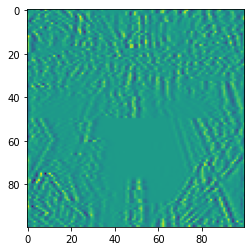

In [ ]:
plt.imshow(broken_image.view(100,100)) 

In [ ]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [ ]:
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

In [ ]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [ ]:
lr = 0.8
for i in range(0,40000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.021167762577533722
Loss at 1000 = 0.021168485283851624
Loss at 2000 = 0.021169019863009453
Loss at 3000 = 0.021166538819670677
Loss at 4000 = 0.021162036806344986
Loss at 5000 = 0.021159442141652107
Loss at 6000 = 0.02115774154663086
Loss at 7000 = 0.021157125011086464
Loss at 8000 = 0.02115938812494278
Loss at 9000 = 0.021158868446946144
Loss at 10000 = 0.021160036325454712
Loss at 11000 = 0.02115844190120697
Loss at 12000 = 0.0211611520498991
Loss at 13000 = 0.02115965075790882
Loss at 14000 = 0.02115611545741558
Loss at 15000 = 0.021163420751690865
Loss at 16000 = 0.021160781383514404
Loss at 17000 = 0.021161755546927452
Loss at 18000 = 0.021161679178476334
Loss at 19000 = 0.021161045879125595
Loss at 20000 = 0.021160339936614037
Loss at 21000 = 0.02115952968597412
Loss at 22000 = 0.021158475428819656
Loss at 23000 = 0.021162016317248344
Loss at 24000 = 0.021156370639801025
Loss at 25000 = 0.021159043535590172
Loss at 26000 = 0.021159280091524124
Loss at 27000 = 0.0211

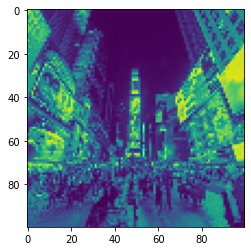

In [ ]:
plt.imshow(random_tensor.view(100,100).data)